# Load Dataset

In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
rcParams ['figure.figsize'] = (10,7)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Load dataset
df = pd.read_csv('/content/gdrive/MyDrive/loan_data_2007_2014.csv')
print(df.shape) #see the number of rows and columns

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(466285, 75)


In [ ]:
# Displays sample data of 3
df.sample(3)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
450343,450343,11385111,13327260,21000,21000,21000.0,36 months,16.24,740.79,C,C5,Flight attendant,10+ years,RENT,80000.0,Verified,Jan-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 01/29/14 > Debt consolidat...,debt_consolidation,Debt consolidation,775xx,TX,20.54,0.0,Jan-00,2.0,NaN,NaN,14.0,0.0,21405,60.1,36.0,f,0.00,0.00,23814.460000,23814.46,21000.00,2814.46,0.0,0.0,0.0,Jan-15,16406.56,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,56700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35600.0,NaN,NaN,NaN
429394,429394,12606701,14618863,17000,17000,17000.0,36 months,10.99,556.48,B,B2,Marketing Directory,10+ years,OWN,65000.0,Source Verified,Mar-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,328xx,FL,18.24,0.0,May-91,0.0,NaN,NaN,7.0,0.0,17349,85.0,14.0,w,7280.66,7280.66,12242.560000,12242.56,9719.34,2523.22,0.0,0.0,0.0,Jan-16,556.48,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,34543.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20400.0,NaN,NaN,NaN
205032,205032,1445296,1697959,7550,7550,7550.0,36 months,6.03,229.79,A,A1,Rush Warehouse,1 year,RENT,30000.0,Not Verified,Aug-12,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Loan,606xx,IL,14.44,0.0,Sep-80,0.0,NaN,NaN,11.0,0.0,2534,6.5,17.0,f,0.00,0.00,8209.937971,8209.94,7550.00,659.94,0.0,0.0,0.0,Oct-14,2466.63,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.drop(columns=['Unnamed: 0'], inplace = True) #it's just a sequence of indexes in the dataset

In [ ]:
# For the next process will use the copied data
df_clean = df.copy()

# Data Wrangling

In [ ]:
# Information about the DataFrame
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [ ]:
# Convert term column to interger
df_clean['term'] = df_clean['term'].apply(lambda term: int(term[:3]))

In [ ]:
# Descriptive statistics
df_clean.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,42.605334,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,10.719040,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,36.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,36.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,36.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,60.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN


In [ ]:
# Total value of each column
for col in df:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print('___'*20, '\n')
    print()

Value count kolom id:
1077501     1
26180404    1
26219322    1
26239577    1
26290537    1
           ..
3714715     1
3703738     1
3731030     1
3705772     1
9199665     1
Name: id, Length: 466285, dtype: int64
____________________________________________________________ 


Value count kolom member_id:
1296599     1
28653081    1
28692177    1
28702376    1
28763241    1
           ..
4686866     1
4847180     1
4724047     1
4678105     1
11061576    1
Name: member_id, Length: 466285, dtype: int64
____________________________________________________________ 


Value count kolom loan_amnt:
10000    33023
12000    25519
15000    23486
20000    22759
35000    16596
         ...  
34250        1
33400        1
32150        1
34325        1
33175        1
Name: loan_amnt, Length: 1352, dtype: int64
____________________________________________________________ 


Value count kolom funded_amnt:
10000    32930
12000    25426
15000    23370
20000    22571
35000    16458
         ...  
34075

#Data Cleaning

## Check Duplicated Values

In [ ]:
df_clean.duplicated().sum()

0

## Check Missing Values

In [ ]:
# Total null values
total_null = df_clean.isnull().sum()
percentase_null = df_clean.isnull().sum() * 100/ len(df)
dtype = [df_clean[col].dtype for col in df_clean.columns]
df_missing_value = pd.DataFrame({'total_null': total_null,
                                'data_type': dtype,
                                'percent_missing': percentase_null})
df_missing_value.sort_values('percent_missing', ascending = False,inplace = True)
missing_value = df_missing_value[df_missing_value['percent_missing']>0].reset_index()

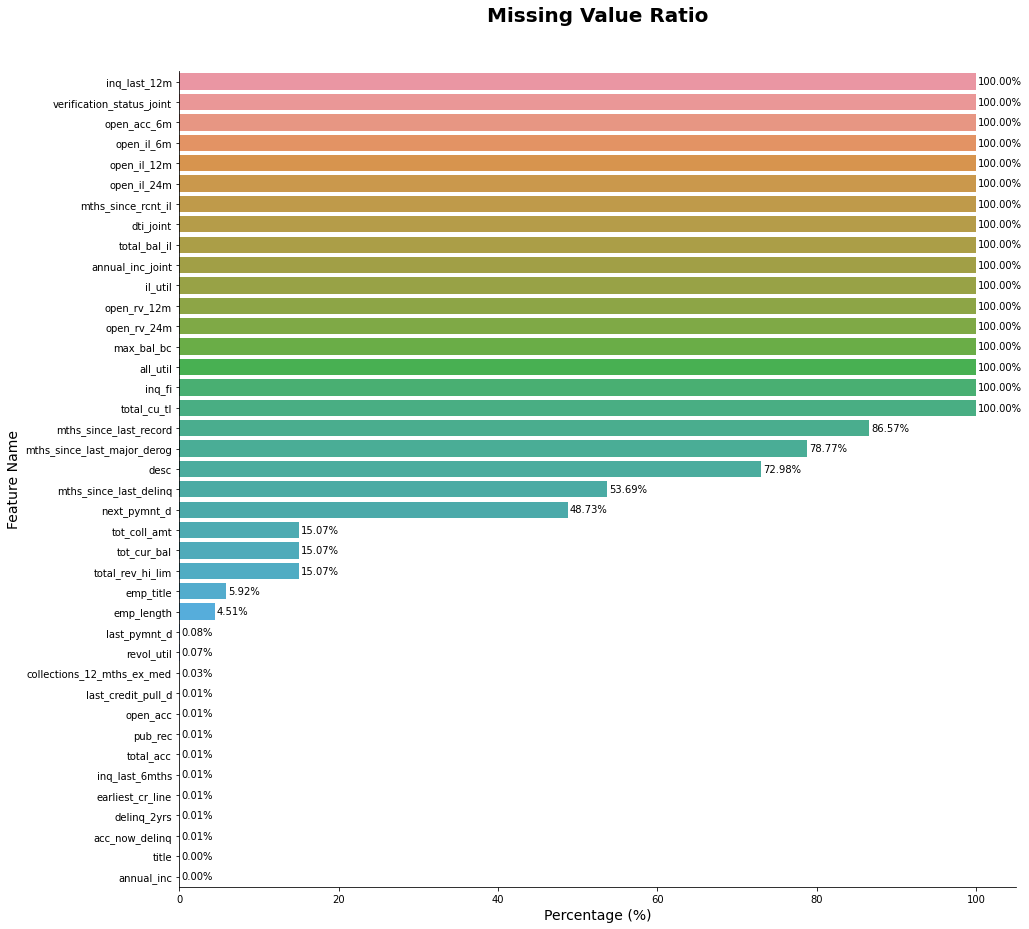

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.title("Missing Value Ratio", fontsize=20, color='black', weight='bold',pad = 50)
sns.barplot(y='index', x='percent_missing', data=missing_value)
plt.bar_label(ax.containers[0], padding=2,fmt='%.2f%%')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('Feature Name', fontsize=14)
sns.despine()

## Handling Missing Values

In [ ]:
# Drop feature that have more than 20% missing value
col_full_null = df_missing_value.loc[df_missing_value['percent_missing']> 20].index.tolist()
df_clean.drop(columns=col_full_null, inplace = True)

# Feature `tot_coll_amt`,`tot_cur_bal`,`total_rev_hi_lim` replace missing value with "0" because asumption that customer didn't borrowed again
for col in ['tot_coll_amt','tot_cur_bal','total_rev_hi_lim']:
    df_clean[col] = df_clean[col].fillna(0)
    
# Numerical columns replace missing value with "Median"
for col in df_clean.select_dtypes(exclude = 'object'):
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())
df_clean.isnull().sum()

# Categorical columns replace missing value with "Mode"
for col in df_clean.select_dtypes(include = 'object'):
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode().iloc[0])

df_clean.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_ac

## Feature target : <mark> is_good

In [ ]:
df_clean['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [ ]:
good_loan = ['Current','Fully Paid','In Grace Period']
df_clean['is_good'] = np.where(df_clean['loan_status'].isin(good_loan),1,0)
df_clean['is_good'].value_counts()

1    412111
0     54174
Name: is_good, dtype: int64

## Delete irrelevant columns

In [ ]:
df_clean.drop(columns=['id','member_id','url','title','addr_state','zip_code','policy_code','application_type','emp_title'], inplace = True)

In [ ]:
df_clean.shape

(466285, 44)

In [ ]:
df_clean.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,is_good
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,0.0,0.0,0.0,0.0,0.0,1
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0.0,0.0,0.0,0.0,0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,0.0,0.0,0.0,0.0,0.0,1
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,0.0,0.0,0.0,0.0,1
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
# For the next process will use the copied data
df_eda = df_clean.copy()

# Exploratory Data Analysis

## Univariate Analysis

In [ ]:
num = df_eda.select_dtypes(include='number').columns
cat = ['grade','emp_length', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status']

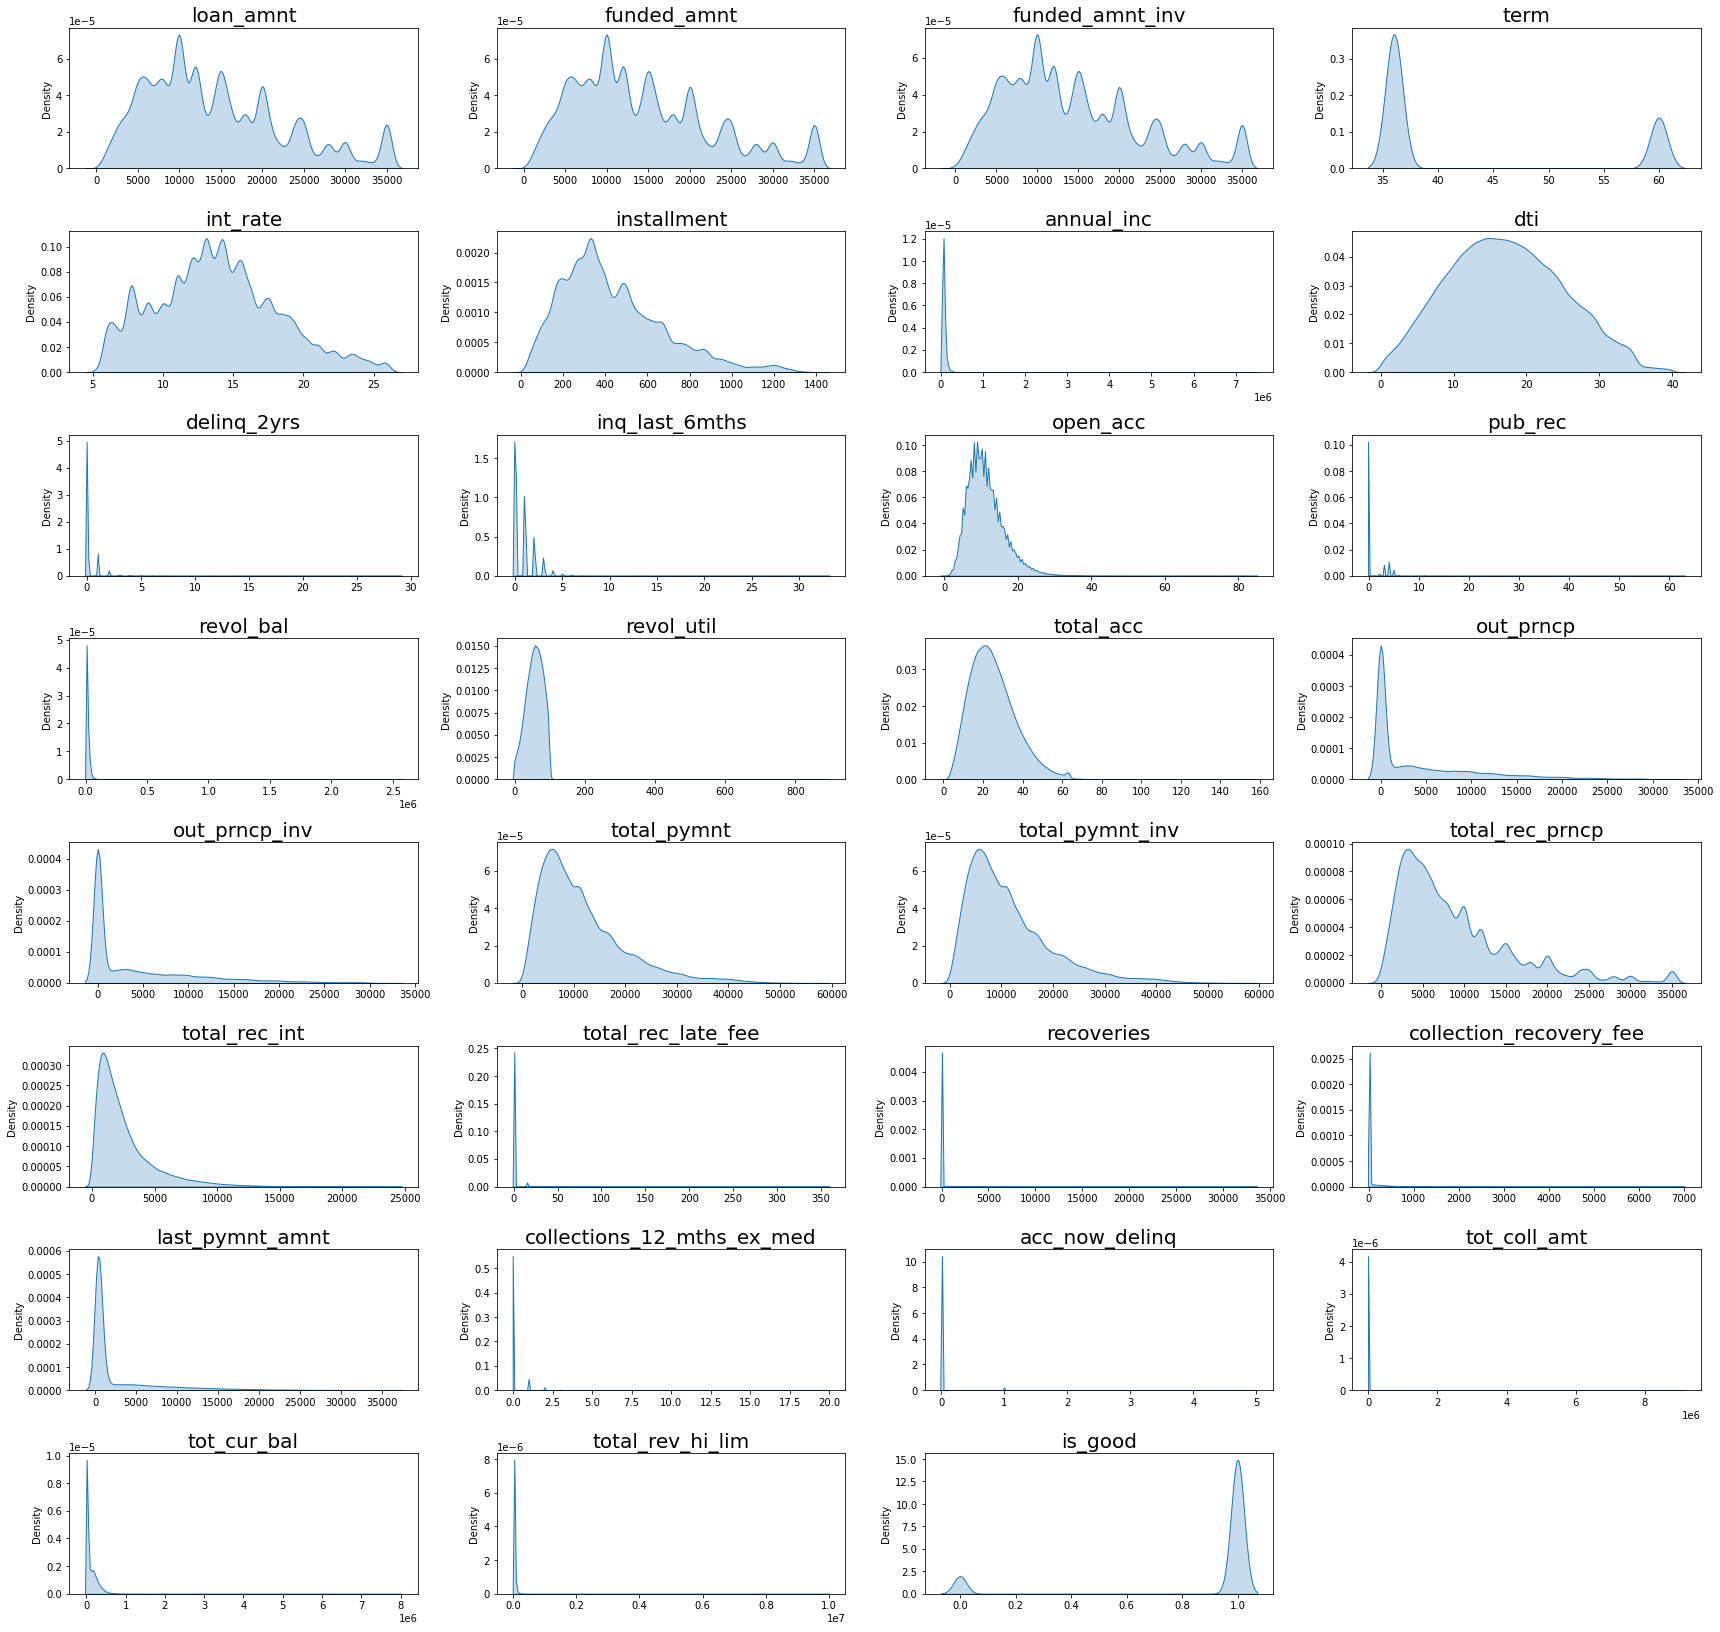

In [ ]:
plt.figure(figsize=(24,28))
for i in range(0,len(num)):
    plt.subplot(10,4,i+1)
    sns.kdeplot(x=df_eda[num[i]], palette='viridis', shade=True)
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

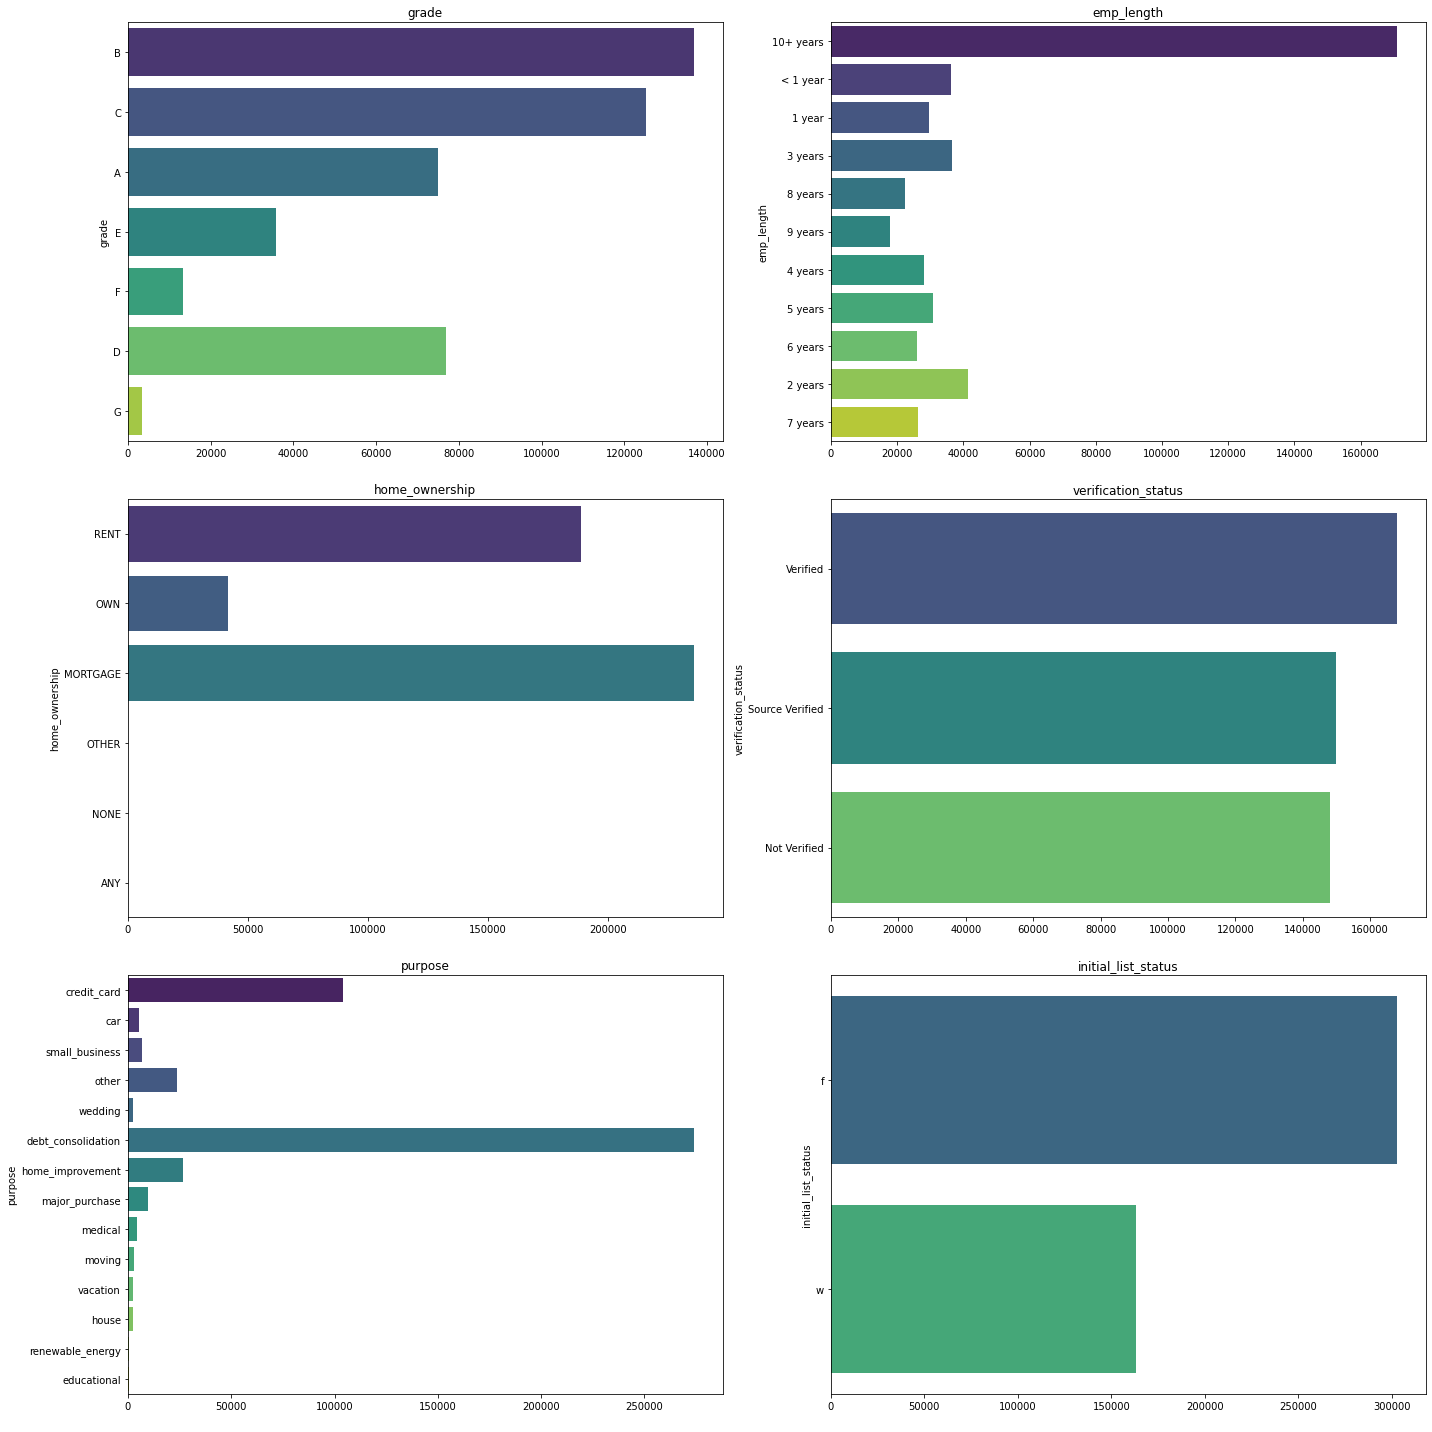

In [ ]:
plt.figure(figsize=(20,20))
for i in range(0,len(cat)):
    plt.subplot(3,2,i+1)
    sns.countplot(y=df_eda[cat[i]], orient = 'h',palette='viridis')
    plt.title(cat[i])
    plt.xlabel(' ')
    plt.tight_layout()

## Multivariate Analysis

<AxesSubplot:>

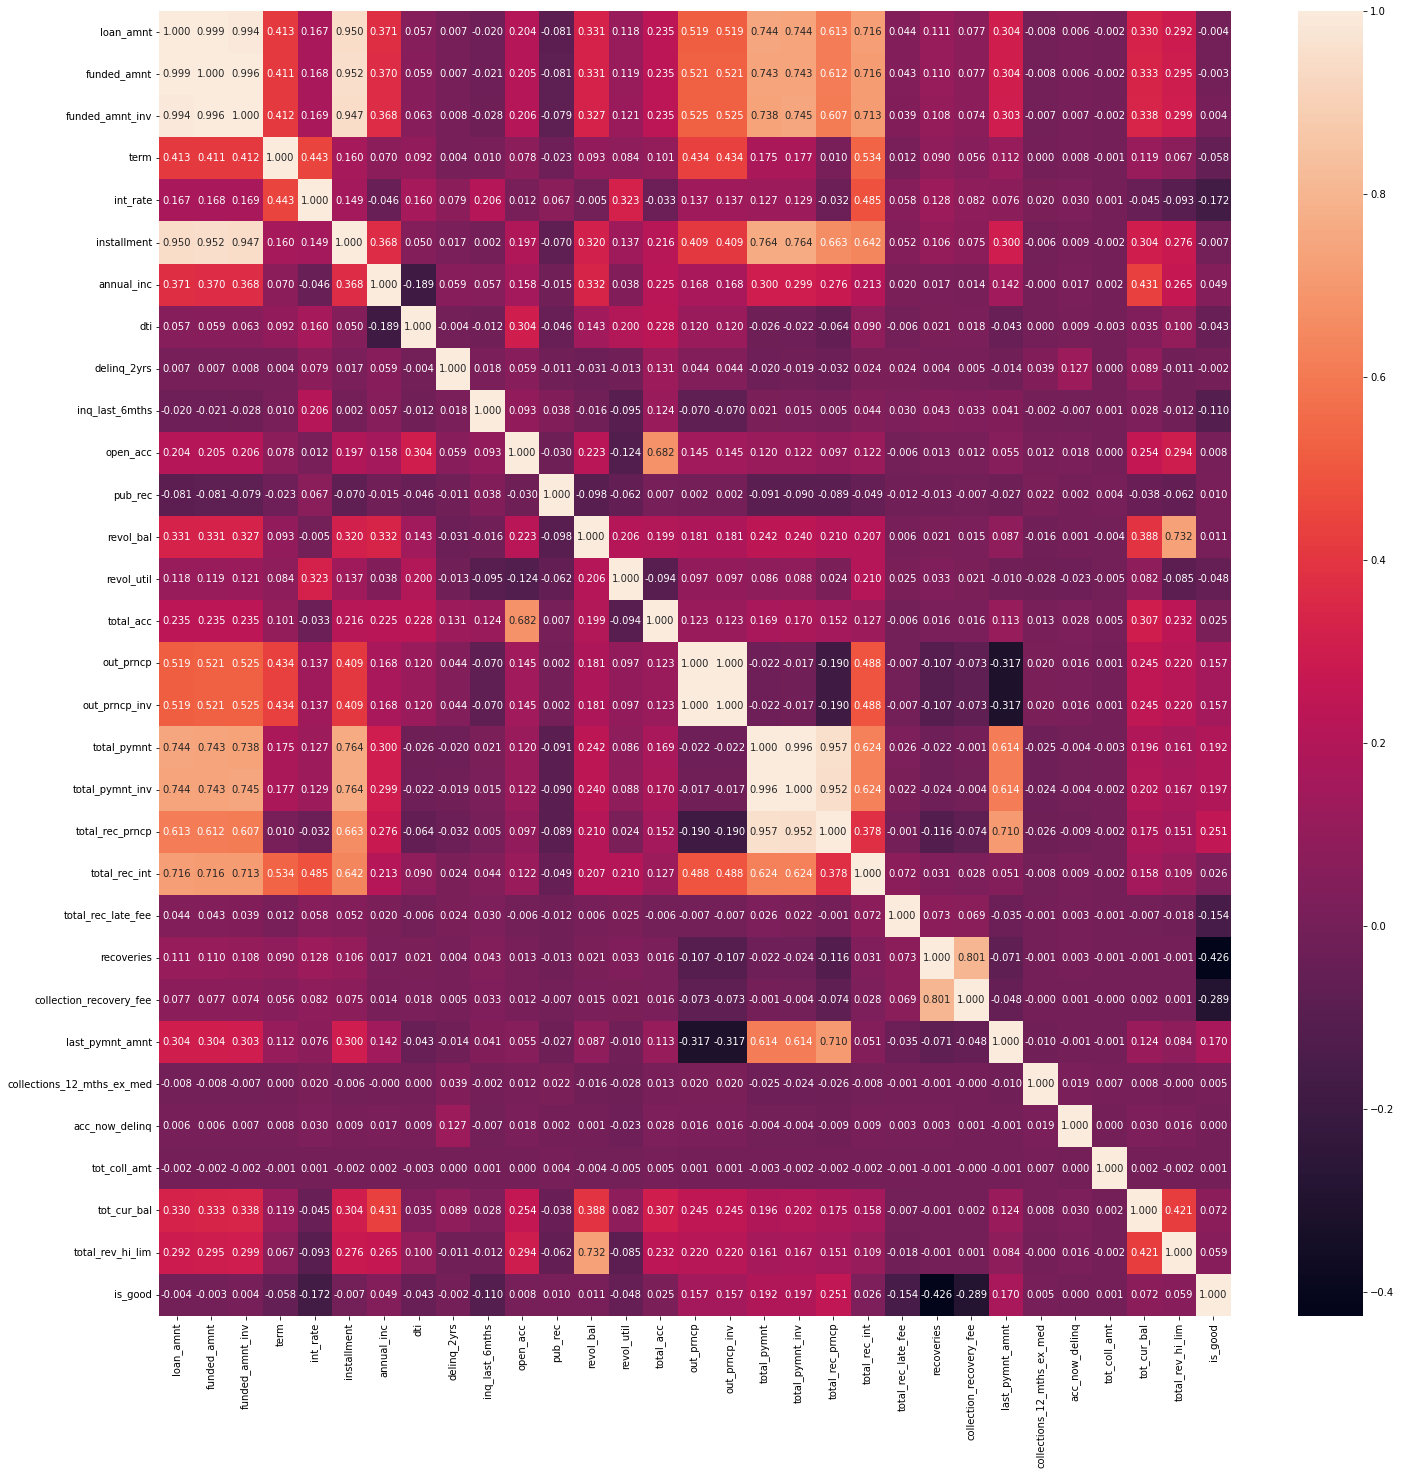

In [ ]:
plt.figure(figsize=(24,24))
sns.heatmap(df_eda.corr(),annot=True,fmt='.3f')

In [ ]:
df_eda.sample(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,is_good
355252,10000,10000,10000.0,36,14.99,346.61,C,C5,1 year,RENT,49000.0,Not Verified,Jul-14,Current,n,debt_consolidation,22.80,2.0,Sep-92,1.0,13.0,0.0,23957,79.1,34.0,f,1993.28,1993.28,9738.98,9738.98,8006.72,1732.26,0.0,0.0,0.0,Jan-16,346.61,Jan-16,0.0,0.0,201.0,208948.0,30300.0,1
423088,10000,10000,10000.0,36,11.99,332.10,B,B3,10+ years,MORTGAGE,40000.0,Not Verified,Mar-14,Current,n,credit_card,14.43,0.0,Jun-97,4.0,4.0,1.0,2883,55.0,25.0,w,4604.71,4604.71,6974.10,6974.10,5395.29,1578.81,0.0,0.0,0.0,Jan-16,332.10,Jan-16,0.0,0.0,0.0,22451.0,5200.0,1
241683,9000,9000,9000.0,36,12.99,303.21,C,C2,3 years,MORTGAGE,48000.0,Source Verified,Nov-14,Current,n,debt_consolidation,31.85,1.0,Jun-04,0.0,10.0,0.0,7377,78.5,19.0,w,6143.95,6143.95,3928.74,3928.74,2856.05,1072.69,0.0,0.0,0.0,Dec-15,303.21,Jan-16,0.0,0.0,97.0,100676.0,9400.0,1


# Pre Processing

## Label Encoding

In [ ]:
mapping_grade = {'A':'0',
                 'B':'1',
                 'C':'2',
                 'D':'3',
                 'E':'4',
                 'F':'5',
                 'G':'6'}


df_eda['grade'] = df_eda['grade'].map(mapping_grade)

## One Hot Encoding

In [ ]:
for cat in ['home_ownership', 'emp_length']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df_eda = df_eda.join(onehots)

In [ ]:
df_eda.sample(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,is_good,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year
41931,3000,3000,3000.0,36,10.71,97.81,1,B5,< 1 year,RENT,40000.0,Not Verified,Feb-08,Does not meet the credit policy. Status:Charge...,n,debt_consolidation,13.09,0.0,Sep-98,8.0,8.0,0.0,10036,82.9,13.0,f,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,Jan-16,0.0,Jan-16,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
219891,6450,6450,6450.0,36,7.62,201.00,0,A3,1 year,RENT,15000.0,Source Verified,Apr-12,Charged Off,n,debt_consolidation,20.32,1.0,Apr-05,0.0,10.0,0.0,7117,49.1,21.0,f,0.0,0.0,3611.16,3611.16,3035.9,575.26,0.0,0.0,0.0,Nov-13,201.0,Jan-16,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_modeling = df_eda.copy()

# Modeling

In [ ]:
#Feature
X = df_modeling[['home_ownership_ANY','home_ownership_MORTGAGE','home_ownership_NONE','home_ownership_OTHER','home_ownership_OWN',
        'home_ownership_RENT','emp_length_1 year','emp_length_10+ years','emp_length_2 years','emp_length_3 years',
        'emp_length_4 years','emp_length_5 years','emp_length_6 years','emp_length_7 years','emp_length_8 years','emp_length_9 years',
        'emp_length_< 1 year','grade','loan_amnt','dti','int_rate','open_acc','total_pymnt','revol_bal','revol_util']]

#Target
y = df_modeling['is_good']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Data Train sebanyak :', X_train.shape)
print('Data Test sebanyak :', X_test.shape)

Data Train sebanyak : (326399, 25)
Data Test sebanyak : (139886, 25)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))


    score = cross_validate(model, X, y, cv=5, scoring='accuracy', return_train_score=True)
    print('accuracy (crossval train): '+ str(score['train_score'].mean()))
    print('accuracy (crossval test): '+ str(score['test_score'].mean()))
    score = cross_validate(model, X, y, cv=5, scoring='precision', return_train_score=True)
    print('Precision (crossval train): '+ str(score['train_score'].mean()))
    print('Precision (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train = model.predict(X_train)
        train_recall = recall_score(y_train, y_pred_train)
        train_scores.append(train_recall)

        # eval on test
        y_pred = model.predict(X_test)
        test_recall = recall_score(y_test, y_pred)
        test_scores.append(test_recall)

        print('param value: ' + str(c) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('Recall')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

## Logistics Regression

Accuracy (Train Set): 0.89
Accuracy (Test Set): 0.89
Precision (Train Set): 0.90
Precision (Test Set): 0.90
Recall (Train Set): 0.99
Recall (Test Set): 0.99
F1-Score (Train Set): 0.94
F1-Score (Test Set): 0.94
roc_auc (train-proba): 0.77
roc_auc (test-proba): 0.77


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

accuracy (crossval train): 0.8944229387606292
accuracy (crossval test): 0.8806373784273568


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Precision (crossval train): 0.8973638222059831
Precision (crossval test): 0.8955591669157622


<AxesSubplot:>

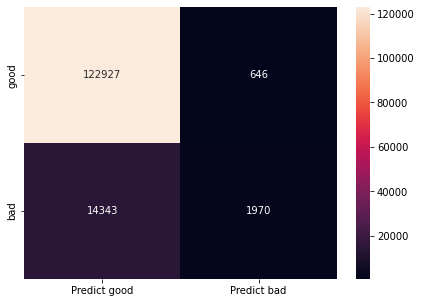

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(X_train,y_train)
eval_classification(logreg)

y_pred = logreg.predict(X_test)
cm=metrics.confusion_matrix(y_test,y_pred,labels=[1,0])
df_cm = pd.DataFrame(cm,index=[i for i in ['good','bad']],
                     columns=[i for i in ['Predict good','Predict bad']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
eval_classification(dt)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.90
Precision (Train Set): 1.00
Precision (Test Set): 0.95
Recall (Train Set): 1.00
Recall (Test Set): 0.94
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.94
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.77
accuracy (crossval train): 1.0
accuracy (crossval test): 0.7754120334130413
Precision (crossval train): 1.0
Precision (crossval test): 0.9302862986059353


## Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=42)
clf.fit(X_train, y_train)
eval_classification(clf)

Accuracy (Train Set): 0.91
Accuracy (Test Set): 0.91
Precision (Train Set): 0.91
Precision (Test Set): 0.91
Recall (Train Set): 0.99
Recall (Test Set): 0.99
F1-Score (Train Set): 0.95
F1-Score (Test Set): 0.95
roc_auc (train-proba): 0.83
roc_auc (test-proba): 0.83
accuracy (crossval train): 0.9104555154036694
accuracy (crossval test): 0.8903009961718691
Precision (crossval train): 0.913966972780285
Precision (crossval test): 0.9106761636748738
Recall (crossval train): 0.9921265169734103
Recall (crossval test): 0.9713134844994304
f1 (crossval train): 0.9514275601665222
f1 (crossval test): 0.939515566985005
roc_auc (crossval train): 0.8384242441509165
roc_auc (crossval test): 0.8035462657654501
